In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read in the data
retail = pd.read_csv('http://fimi.uantwerpen.be/data/retail.dat')
records = retail.values.tolist()
for i in range(len(records)):
    records[i] = records[i][0].split()

In [3]:
percentages = [0.2,0.4,0.6,0.8,1] #Percentages of dataset to being processed
thresholds = [0.01, 0.02, 0.05] 
samples = []
durations = []

# Loop through percentages and make random samples 
for percentage in percentages:
    samples.append(records[0:int(len(records)*percentage)])

In [4]:
c = 0
# For loop to iterate trhough samples list
for s in samples:  
    print(f'PROCESSING {percentages[c]*100}% OF DATASET')
    # For loop to iterate through thresholds list
    for x in thresholds:
        items = {}
        arr = []
        threshold = len(s)*x
        start = time.time()
    # Finding frequent items in the dataset and their corresponding values
        for i in range(len(s)):
            for j in range(len(s[i])):
                if s[i][j] not in items:
                    items[s[i][j]] = 0 
                items[s[i][j]] += 1

        C1 = pd.DataFrame({
                'Itemset': items.keys(),
                'Support': items.values()
            }) 
        L1 = C1.loc[(C1['Support']) >= threshold]  #Pruning frequent items list with threshold
        
        #Finding the frequent pairs in the itemset and the count
        for i in L1['Itemset']:
            for j in L1['Itemset']:
                if i == j:
                    pass
                else:
                    for k in s:
                        if i in k and j in k and [i,j,0] not in arr and [j,i,0] not in arr:
                            arr.append([i,j,0])

        for i in range(len(arr)):
            for j in s:
                if arr[i][0] in j and arr[i][1] in j:
                    arr[i][2] += 1

        C2 = pd.DataFrame(arr, columns=['Item 1','Item 2','Count'])
        L2 = C2.loc[(C2['Count']) >= threshold]  #Pruning frequent pairs list with threshold
        end2 = time.time()
        pass_2_time = end2-start
        print(f'\tFINISHED RUNNING THRESHOLD {x} \t{pass_2_time}s')

        end = time.time()
        duration = end-start 
        durations.append(duration)
    print(f'PROCESEED {percentages[c]*100}% OF DATASET\t{durations[-1]+durations[-2]+durations[-3]}s')

    c+=1
    print('----------------------------------------------------------------------')
print("Durations: \t",durations)


PROCESSING 20.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	18.663937091827393s
	FINISHED RUNNING THRESHOLD 0.02 	1.8949098587036133s
	FINISHED RUNNING THRESHOLD 0.05 	0.11051011085510254s
PROCESEED 20.0% OF DATASET	20.66951847076416s
----------------------------------------------------------------------
PROCESSING 40.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	38.937995195388794s
	FINISHED RUNNING THRESHOLD 0.02 	3.17788028717041s
	FINISHED RUNNING THRESHOLD 0.05 	0.22261881828308105s
PROCESEED 40.0% OF DATASET	42.338711977005005s
----------------------------------------------------------------------
PROCESSING 60.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	48.49617004394531s
	FINISHED RUNNING THRESHOLD 0.02 	4.783084869384766s
	FINISHED RUNNING THRESHOLD 0.05 	0.44788098335266113s
PROCESEED 60.0% OF DATASET	53.72746992111206s
----------------------------------------------------------------------
PROCESSING 80.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	62.64422297477722

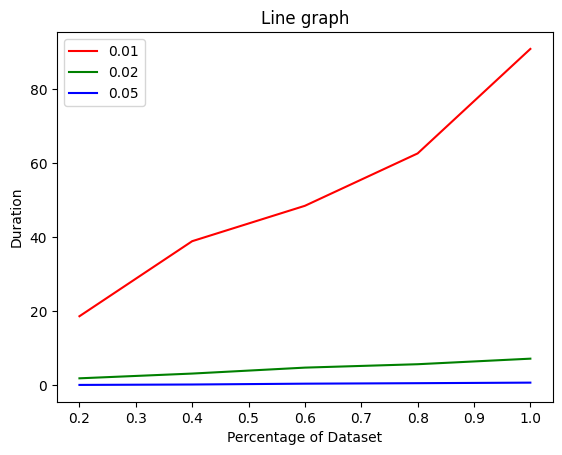

In [5]:
x = np.arange(0.2, 1.2, 0.2)
plt.title("Line graph")
plt.xlabel("Percentage of Dataset")
plt.ylabel("Duration")
plt.plot(x, durations[0:13:3], color = "red", label = '0.01')
plt.plot(x, durations[1:14:3], color = "green", label = '0.02')
plt.plot(x, durations[2:15:3], color = "blue", label = '0.05')
plt.legend()
plt.show()